<a href="https://colab.research.google.com/github/eslamzoghla/Intel-Image-Classification/blob/main/Intel%20Image%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  <font color='DarkOrange'>0. Connect between Kaggle dataset and colab </font>

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"eslamzoghla","key":"dc09c4d807a162502eddc462a08d37fa"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                        title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/top-spotify-songs-2023                    Most Streamed Spotify Songs 2023                47KB  2023-08-26 11:04:57          16172        506  1.0              
prasad22/daily-transactions-dataset                        Daily Transactions Dataset                      34KB  2023-09-25 02:32:21            688         30  1.0              
joebeachcapital/students-performance                       Students Performance                             2KB  2023-08-31 00:50:11           5708        141  1.0              
carlmcbrideellis/zzzs-lightweight-training-dataset-target  Zzzs: Lightweight training dataset + target    185M

In [ ]:
! kaggle datasets download -d puneet6060/intel-image-classification

100% 346M/346M [00:15<00:00, 26.4MB/s]
100% 346M/346M [00:15<00:00, 23.4MB/s]


In [ ]:
! unzip intel-image-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

#  <font color='DarkOrange'>1.Import Libraries </font>

In [ ]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools
from PIL import Image
from tqdm import tqdm
# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization, Input, GlobalAveragePooling2D
from tensorflow.keras import regularizers
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


# <font color='orange' > 2. Read Data </font>

In [ ]:
train_dir = '/content/seg_train/'
test_dir = '/content/seg_test/'
pred_dir = '/content/seg_pred/'

In [ ]:
for Folder in os.listdir(train_dir + 'seg_train'):
  files = gb.glob(pathname= str(train_dir+'seg_train/'+Folder+'/*.jpg'))
  print(f'For Training Data Found {len(files)} in Folder: {Folder}')

For Training Data Found 2512 in Folder: mountain
For Training Data Found 2191 in Folder: buildings
For Training Data Found 2274 in Folder: sea
For Training Data Found 2382 in Folder: street
For Training Data Found 2404 in Folder: glacier
For Training Data Found 2271 in Folder: forest


In [ ]:
for Folder in os.listdir(test_dir + 'seg_test'):
  files = gb.glob(pathname= str(test_dir + 'seg_test/' + Folder + '/*.jpg'))
  print(f'For Testing Data Found {len(files)} in Folder: {Folder}')

For Testing Data Found 525 in Folder: mountain
For Testing Data Found 437 in Folder: buildings
For Testing Data Found 510 in Folder: sea
For Testing Data Found 501 in Folder: street
For Testing Data Found 553 in Folder: glacier
For Testing Data Found 474 in Folder: forest


In [ ]:
files = gb.glob(pathname = str(pred_dir + 'seg_pred/*.jpg'))
print(f'For Predicting Data Found {len(files)}')

For Predicting Data Found 7301


In [ ]:
code = {'buildings': 0, 'mountain': 1, 'sea': 2, 'forest': 3, 'street': 4, 'glacier': 5}

def get_code(n):
  for x,y in code.items():
    if n == y:
      return x

# <font color='orange'> Resize image</font>

In [ ]:
size_of_image = 100

In [ ]:
X_train = []
Y_train = []

for Folder in os.listdir(train_dir + 'seg_train'):
  files = gb.glob(pathname= str(train_dir+'seg_train/'+Folder+'/*.jpg'))
  for file in files:
    img = cv2.imread(file)
    img = cv2.resize(img,(size_of_image,size_of_image))
    X_train.append(list(img))
    Y_train.append(code[Folder])

In [ ]:
X_test = []
Y_test = []

for Folder in os.listdir(test_dir + 'seg_test'):
  files = gb.glob(pathname= str(test_dir+'seg_test/'+Folder+'/*.jpg'))
  for file in files:
    img = cv2.imread(file)
    img = cv2.resize(img,(size_of_image,size_of_image))
    X_test.append(list(img))
    Y_test.append(code[Folder])

#  <font color='DarkOrange'>3. Show Image </font>

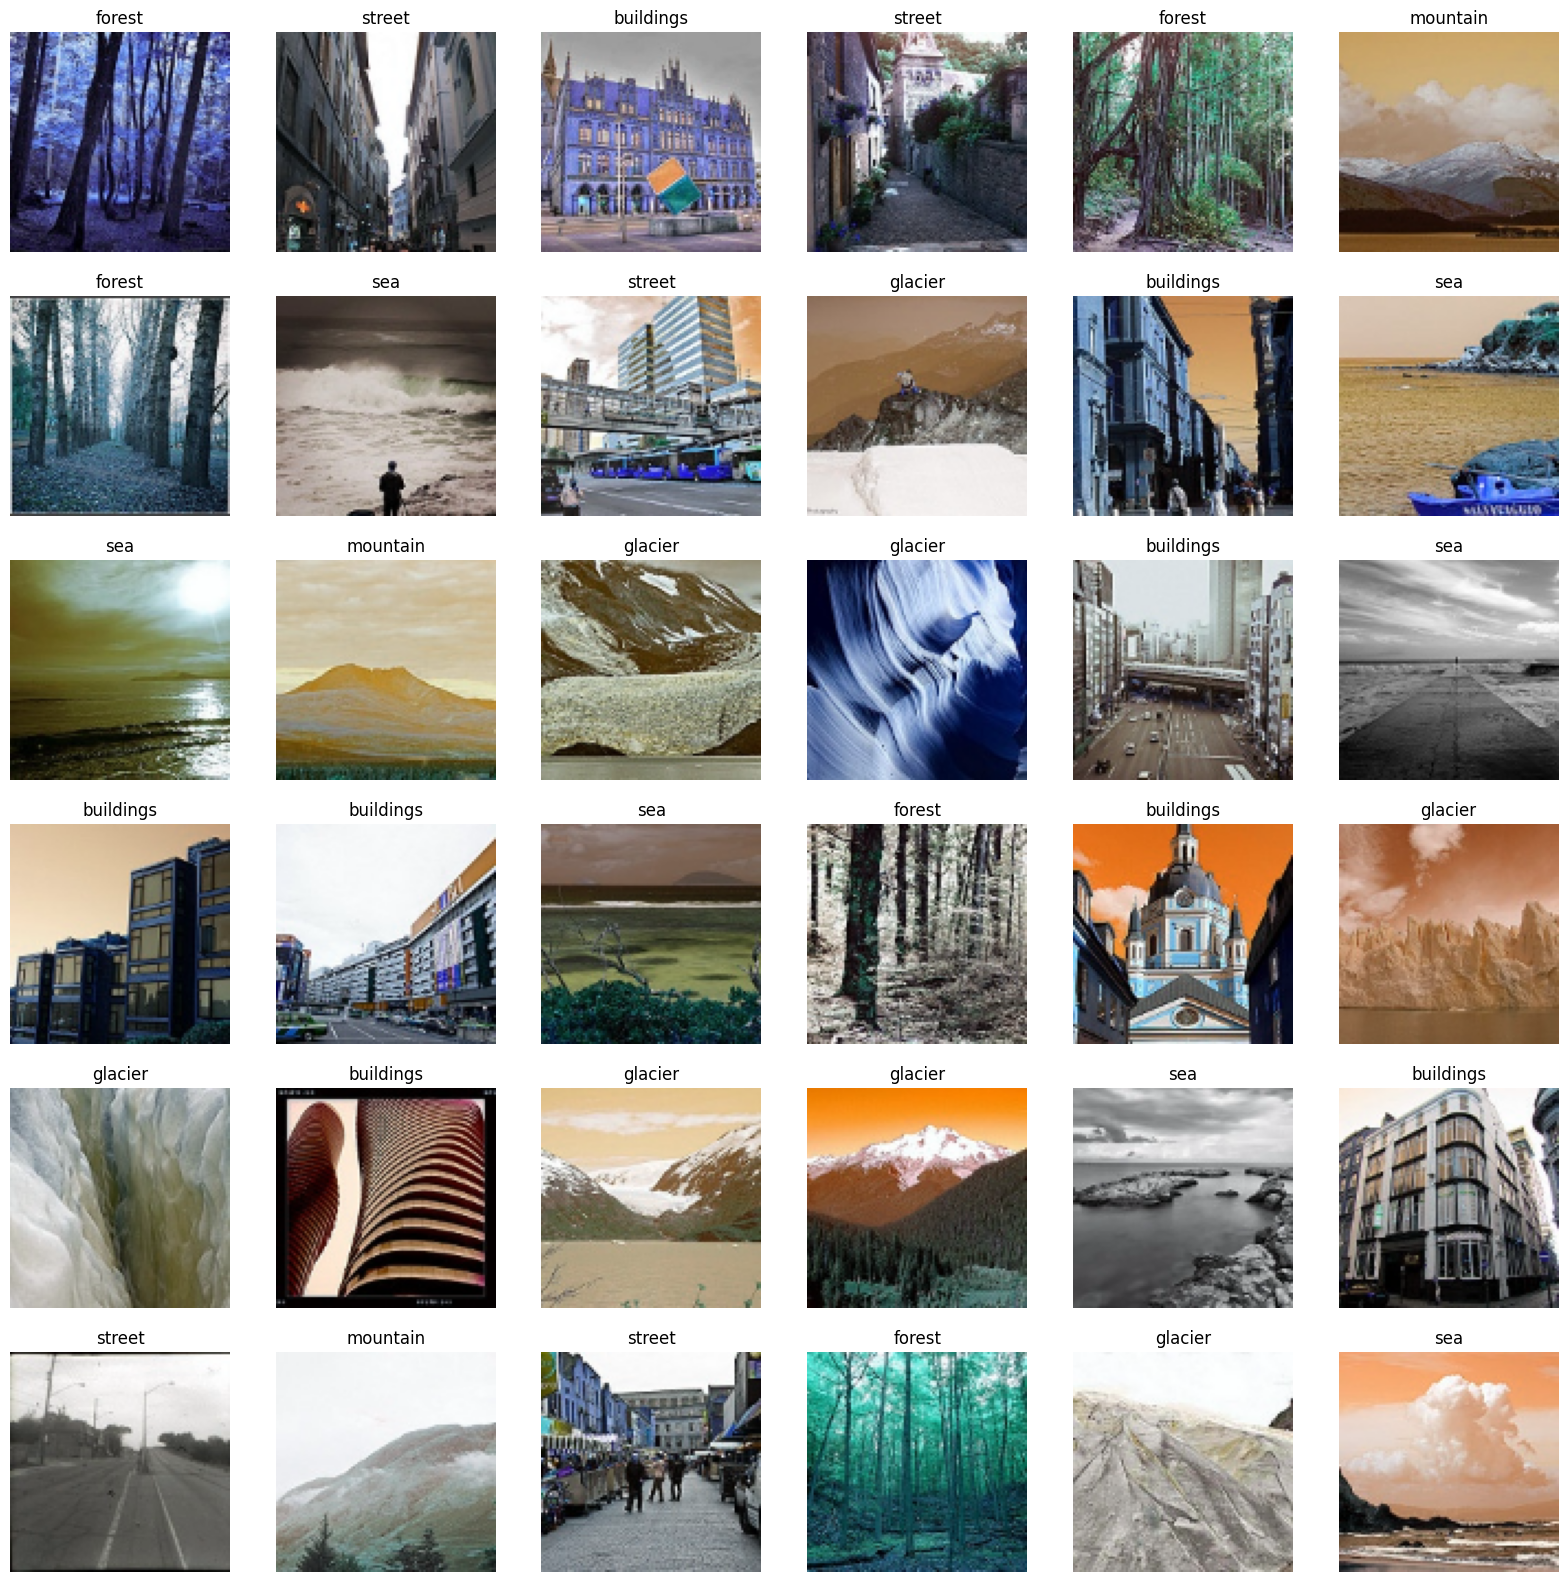

In [ ]:
plt.figure(figsize=(20,20))

for n,i in enumerate(list(np.random.randint(0, len(X_train), 36))):
  plt.subplot(6,6,n+1)
  plt.imshow(X_train[i])



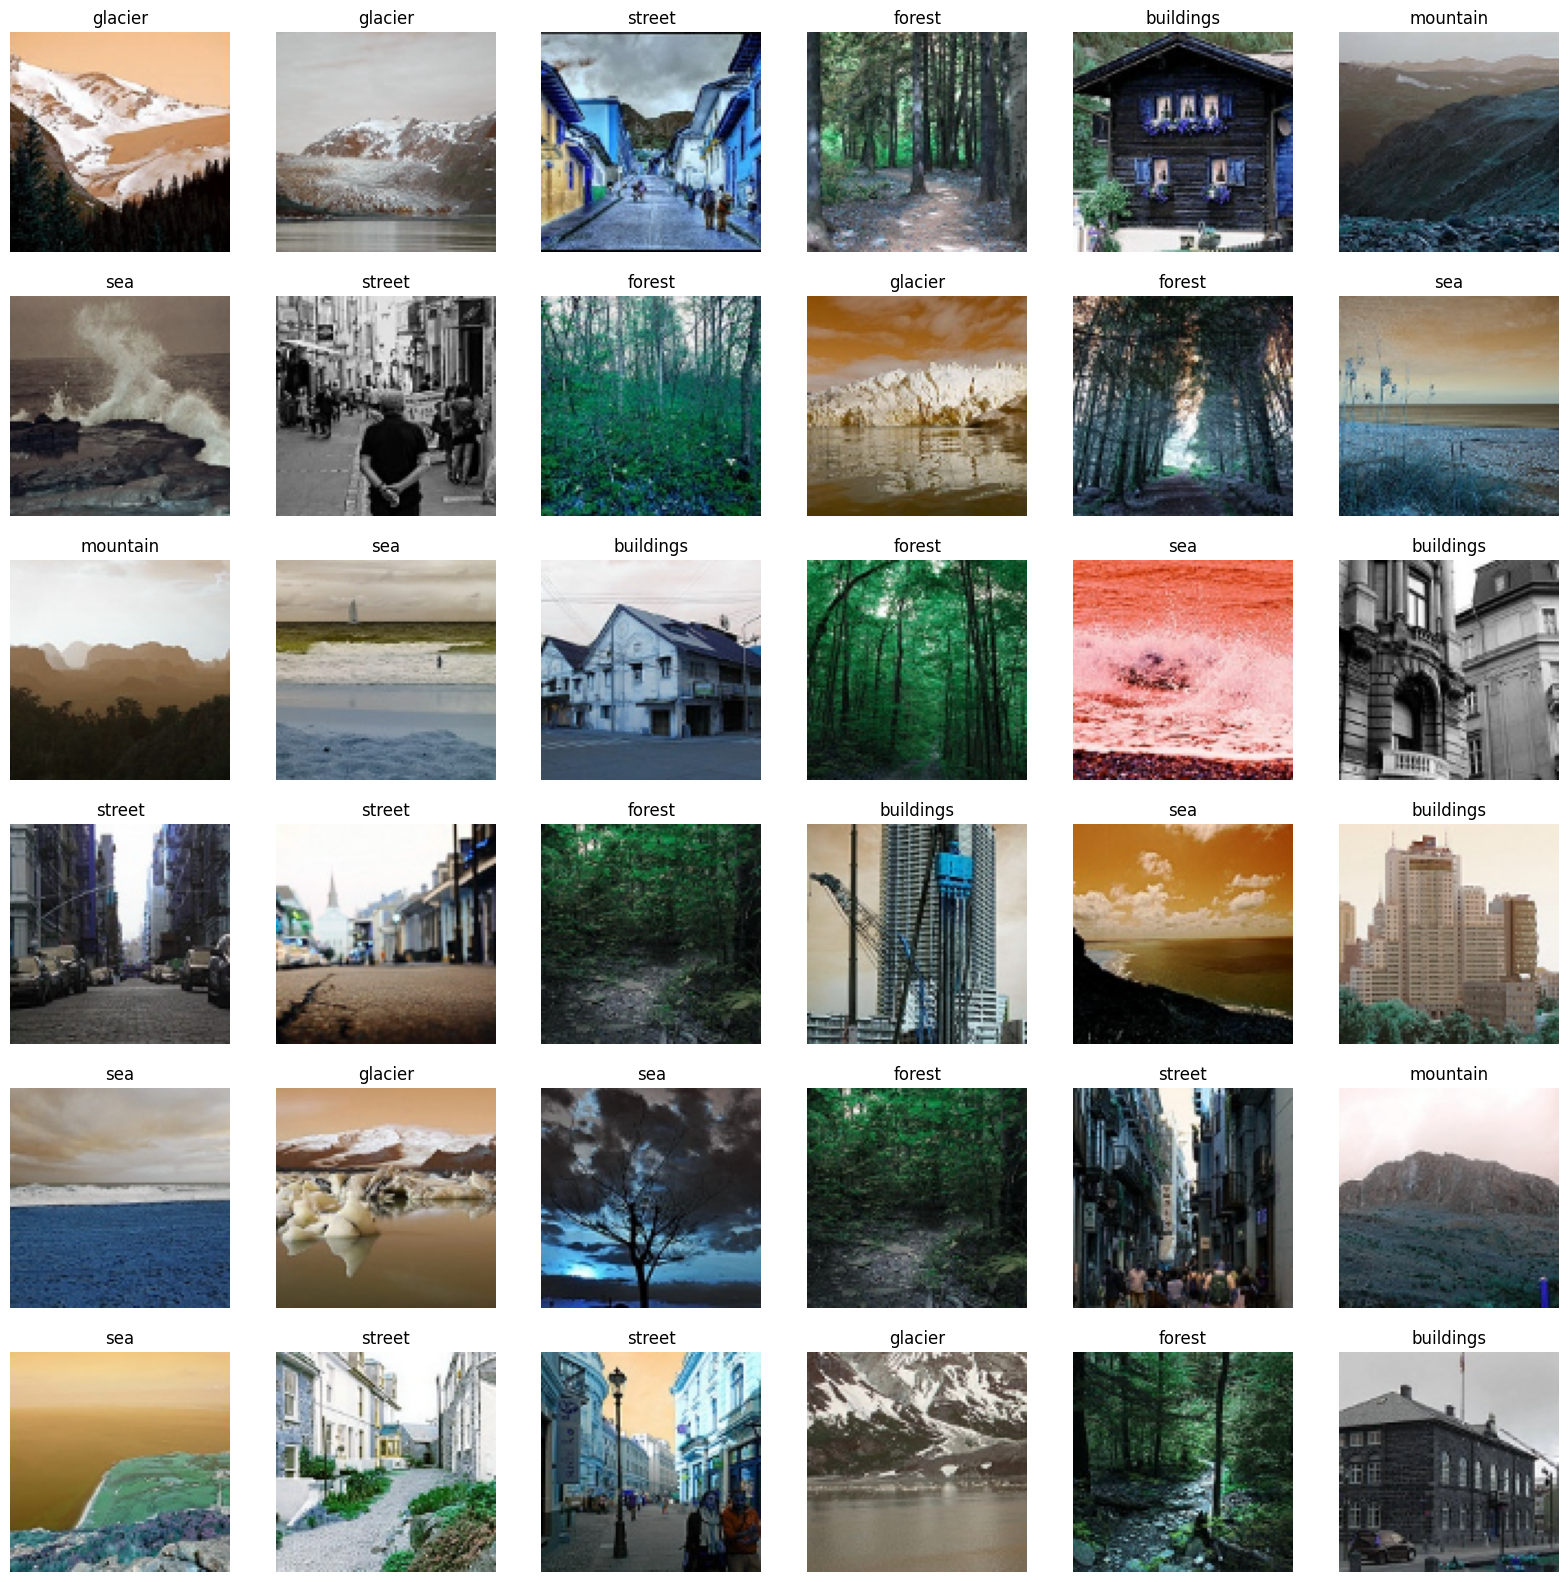

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(train_dir)
test_data = tf.keras.utils.image_dataset_from_directory(test_dir)

train_data = train_data.map(lambda x, y: (x/255, y))
test_data = test_data.map(lambda x, y: (x/255, y))

train_size = int(len(train_data) * 0.6)
val_size = int(len(train_data) * 0.3)
test_size = int(len(test_data) * 0.3)

train_dataset = train_data.take(train_size)
val_dataset = train_data.skip(train_size).take(val_size)
test_dataset = test_data.take(test_size)

Found 14034 files belonging to 1 classes.
Found 3000 files belonging to 1 classes.


In [ ]:
# Load the pre-trained VGG16 model
vgg_model = VGG16(
weights='imagenet',
include_top=False,
input_shape=(256,256,3)
)

# Create a new model by adding a few layers on top of the pre-trained model
model = Sequential()
model.add(vgg_model)

model.add(Conv2D(16, (3,3),1, activation='relu', padding='same'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3),1, activation='relu', padding='same'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3),1, activation='relu', padding='same'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(6, activation='softmax'))

# Freeze the weights of the pre-trained model
model.layers[0].trainable = False

# Compile the model with appropriate loss function, optimizer and metrics
model.compile(Adamax(learning_rate= 0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
%%time

history_vgg = model.fit(
    train_dataset,
    epochs=30,
    validation_data=val_dataset,
    callbacks=[early_stopping]
)

Epoch 1/30
263/263 [==============================] - 99s 305ms/step - loss: 0.0257 - accuracy: 0.9962 - val_loss: 5.0050e-09 - val_accuracy: 1.0000
Epoch 2/30
263/263 [==============================] - 81s 306ms/step - loss: 1.3357e-08 - accuracy: 1.0000 - val_loss: 4.6068e-09 - val_accuracy: 1.0000
Epoch 3/30
263/263 [==============================] - 89s 340ms/step - loss: 1.3045e-08 - accuracy: 1.0000 - val_loss: 4.4078e-09 - val_accuracy: 1.0000
Epoch 4/30
263/263 [==============================] - 79s 302ms/step - loss: 1.2564e-08 - accuracy: 1.0000 - val_loss: 4.1518e-09 - val_accuracy: 1.0000
Epoch 5/30
263/263 [==============================] - 81s 306ms/step - loss: 1.2068e-08 - accuracy: 1.0000 - val_loss: 4.0665e-09 - val_accuracy: 1.0000
Epoch 6/30
263/263 [==============================] - 89s 340ms/step - loss: 1.1671e-08 - accuracy: 1.0000 - val_loss: 3.5831e-09 - val_accuracy: 1.0000
Epoch 7/30
263/263 [==============================] - 79s 302ms/step - loss: 1.1275e-0

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)
test_acc

28/28 [==============================] - 6s 180ms/step - loss: 0.0000e+00 - accuracy: 1.0000


1.0

In [ ]:
model.save('Intel_image.h5')